In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()

plt.show()

<Figure size 640x480 with 1 Axes>

No of charges :  4


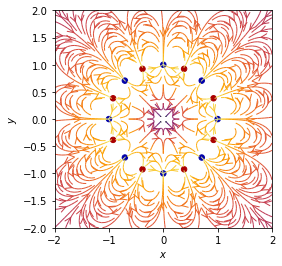

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

# Grid of x, y points
nx, ny = 64, 64
x = np.linspace(-2, 2, nx)
y = np.linspace(-2, 2, ny)
X, Y = np.meshgrid(x, y)

# Create a multipole with nq charges of alternating sign, equally spaced
# on the unit circle.
nq = 2**int(input("n-Pole : "))
charges = []
for i in range(nq):
    q = i%2 * 2 - 1
    charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Electric field vector, E=(Ex, Ey), as separate components
Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
for charge in charges:
    ex, ey = E(*charge, x=X, y=Y)
    Ex += ex
    Ey += ey

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the streamlines with an appropriate colormap and arrow style
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')
plt.show()

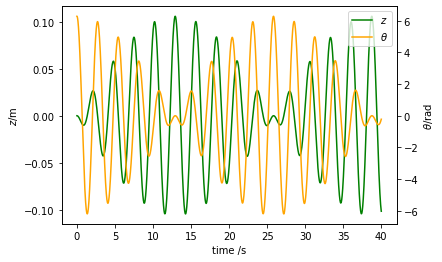

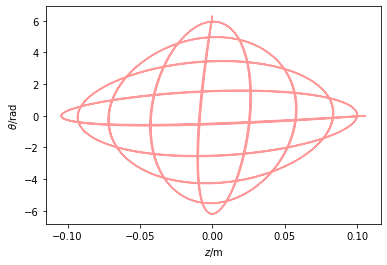

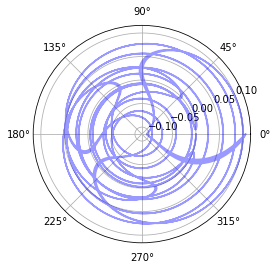

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Parameters for the system
omega = 2.314       # rad.s-1
epsilon = 9.27e-3   # N
m = 0.4905          # kg
I = 1.39e-4         # kg.m2

def deriv(y, t, omega, epsilon, m, I):
    """Return the first derivatives of y = z, zdot, theta, thetadot."""
    z, zdot, theta, thetadot = y
    dzdt = zdot
    dzdotdt = -omega**2 * z - epsilon / 2 / m * theta
    dthetadt = thetadot
    dthetadotdt = -omega**2 * theta - epsilon / 2 / I * z
    return dzdt, dzdotdt, dthetadt, dthetadotdt

# The time grid in s
t = np.linspace(0,40,50000)
# Initial conditions: theta=2pi, z=zdot=thetadot=0
y0 = [0, 0, 2*np.pi, 0]

# Do the numerical integration of the equations of motion
y = odeint(deriv, y0, t, args=(omega, epsilon, m, I))
# Unpack z and theta as a function of time
z, theta = y[:,0], y[:,2]

# Plot z vs. t and theta vs. t on axes which share a time (x) axis
fig, ax_z = plt.subplots(1,1)
l_z, = ax_z.plot(t, z, 'g', label=r'$z$')
ax_z.set_xlabel('time /s')
ax_z.set_ylabel(r'$z /\mathrm{m}$')
ax_theta = ax_z.twinx()
l_theta, = ax_theta.plot(t, theta, 'orange', label=r'$\theta$')
ax_theta.set_ylabel(r'$\theta /\mathrm{rad}$')

# Add a single legend for the lines of both twinned axes
lines = (l_z, l_theta)
labels = [line.get_label() for line in lines]
plt.legend(lines, labels)
plt.show()

# Plot theta vs. z on a cartesian plot
fig, ax1 = plt.subplots(1,1)
ax1.plot(z, theta, 'r', alpha=0.4)
ax1.set_xlabel(r'$z /\mathrm{m}$')
ax1.set_ylabel(r'$\theta /\mathrm{rad}$')
plt.show()

# Plot z vs. theta on a polar plot
fig, ax2 = plt.subplots(1,1, subplot_kw={'projection': 'polar'})
ax2.plot(theta, z, 'b', alpha=0.4)
plt.show()